In [3]:
# load packages
import numpy as np 
import scipy.io
from scipy.io   import  loadmat
import pandas as pd
import os
import matplotlib.pyplot as plt #import matplotlib as plt
from scipy.optimize import curve_fit 
import seaborn as sns #import mat73
import pickle as pkl
from datetime import datetime
from itertools import chain
from scipy.optimize import curve_fit

#### Set directory and import files

In [4]:
# Main Directory of processed file from MatLab
MainDir = 'C:\\plimon\\LTP_analysis\\RCA_Fx_OutputData\\Normalized_CRF_Responses\\' # set dir - on my computer
os.chdir(MainDir) # change old dir, to this dir
d = os.listdir(MainDir) # list files in dir
print(f'Avilable Files to choose from: {len(d)}')
print(f'Files on hand: {d}')
##############################################
FileN_f1 = d[1] #  data     
file_path1 = os.path.join(MainDir, FileN_f1) # join paths and prep 2 load
loadData = pkl.load(open(file_path1, 'rb'))
print(loadData.keys())

Avilable Files to choose from: 2
Files on hand: ['SSRP_Indiviidual_Control_CRF_Reponses_20240610_161814.pkl', 'SSRP_Indiviidual_CRF_Reponses_20240610_144153.pkl']
dict_keys(['F1_Norm_CRF', 'F2_Norm_CRF', 'F1_Diffs', 'F2_Diffs', 'File_Location_Indicies', 'Subj_Num_Ids'])


#### Import Data from previous script

In [5]:
## clean pre post CRF's
F1_Responses = loadData['F1_Norm_CRF']
F2_Responses = loadData['F2_Norm_CRF']

In [6]:
# post - pre crf response for normalized contrasts
F1_Diffs = loadData['F1_Diffs']
F2_Diffs = loadData['F2_Diffs']

In [7]:
# subject names and arrays to index attnL and attnR expts
File_Pos = loadData['File_Location_Indicies']
Subj_Ids = loadData['Subj_Num_Ids']

In [8]:
attnL_File_pos = np.array((File_Pos[:,0]))
attnR_File_pos = np.array((File_Pos[:,1]))

attnL_s  = np.array(attnL_File_pos[~np.isnan(attnL_File_pos)])
attnR_s  = np.array(attnR_File_pos[~np.isnan(attnR_File_pos)])

l_pos = attnL_s.astype(int)
r_pos = attnR_s.astype(int)

print(l_pos)
print(r_pos)

[ 0  2  4  6  8 10 12 14 16 17 21 23 25 27 29 31 33 35 37 39 42 45 47 49
 51 52 53 55 56 58 59 60 62 64]
[ 1  3  5  7  9 11 13 15 18 22 24 26 28 30 32 34 36 38 40 41 43 44 46 48
 50 54 57 61 63 65]


#### Set Color palettes, and plot theme

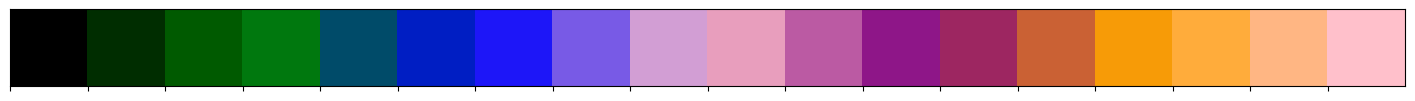

In [9]:
# Define the base colors for blending
base_colors = ['black','green', 'blue', 'pink', 'purple', 'orange', 'pink']
# Number of colors needed in the spectrum
num_colors = 18
fill = sns.blend_palette(base_colors, n_colors=num_colors, as_cmap=False)
sns.palplot(fill)
plt.show()

color_set = [3,6,12,13]

contrast_labs = ['1%','3%','5%','16%','40%','100%']

custom = {"axes.edgecolor": "black", "grid.linestyle": "dashed", "grid.color": "white"}
sns.set_style("darkgrid", rc = custom)

#### Import and get average response per harmonic

In [10]:
Harmonic_to_Avg = 0
########################## set expt groups
### responses to potnetiated stimulus
F1_attnL_diffs = F1_Diffs[l_pos,Harmonic_to_Avg,:] # potentiated stim, attention congruent
F1_attnR_diffs = F1_Diffs[r_pos,Harmonic_to_Avg,:] # potentiated stim, attention incongruent

# responses to non-potentieated stimulus 
F2_attnL_diffs = F2_Diffs[l_pos,Harmonic_to_Avg,:] # non-potentiated, attention congruent
F2_attnR_diffs = F2_Diffs[r_pos,Harmonic_to_Avg,:] # non-potentiated attention incongruent

### cluster groups 
Conditional_DataSets = [F1_attnL_diffs,F1_attnR_diffs,F2_attnL_diffs,F2_attnR_diffs]

Average_Response_Difference = np.zeros((4,6)) # response differences
Average_Response_StandDevs = np.zeros((4,6)) # response standard deviations

for Averages in range(len(Conditional_DataSets)):
    ds_import = np.array(Conditional_DataSets[Averages])
    Average_Response_Difference[Averages,:] = np.nanmean(ds_import,axis = 0)
    # get the square root of number of participants  in this group
    NumObvs = np.sqrt(int((ds_import.shape[0])))
    Average_Response_StandDevs[Averages,:] = (np.nanstd(ds_import,axis = 0) / NumObvs)

#### Plot Average Response Activity together and individually

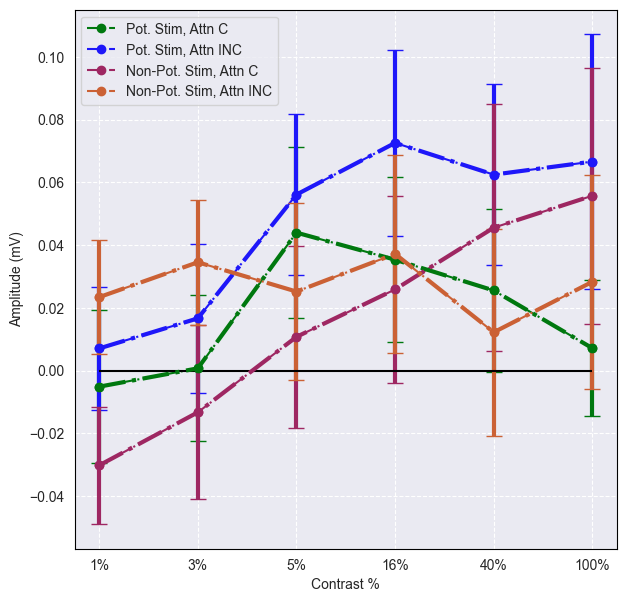

In [11]:
fig,axs = plt.subplots(figsize = (7,7), squeeze=True)

labels = ['Pot. Stim, Attn C','Pot. Stim, Attn INC','Non-Pot. Stim, Attn C ','Non-Pot. Stim, Attn INC']

for sn in  range(4):
    axs.plot(Average_Response_Difference[sn,:], color = fill[color_set[sn]],label = labels[sn],linestyle='-.', marker='o', markersize=6)
    axs.errorbar(x = np.arange(0,6,1),y = Average_Response_Difference[sn,:], yerr = Average_Response_StandDevs[sn,:], color = fill[color_set[sn]], capsize=6 ,linewidth = 3,linestyle='-.', marker='o', markersize=6)
axs.legend()
axs.set_ylabel(f'Amplitude (mV)')
axs.set_xlabel(f'Contrast %')
axs.set_xticks(ticks = np.arange(0,6,1),labels = contrast_labs)
axs.hlines(0,xmin = 0,xmax = 5, color = 'black')

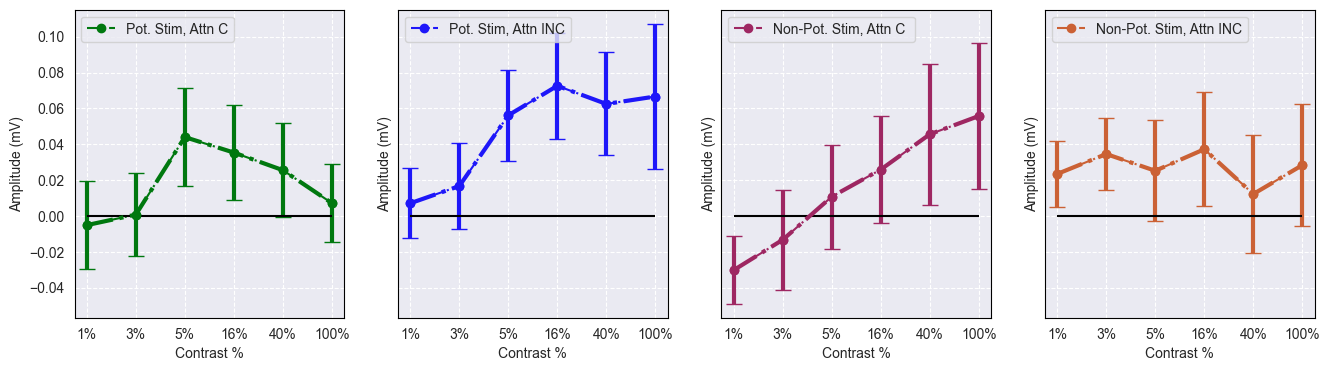

In [12]:
fig,axs = plt.subplots(1,4,figsize = (16,4),sharey= True, squeeze=True)

labels = ['Pot. Stim, Attn C','Pot. Stim, Attn INC','Non-Pot. Stim, Attn C ','Non-Pot. Stim, Attn INC']

for sn in  range(4):
    axs[sn].plot(Average_Response_Difference[sn,:], color = fill[color_set[sn]],label = labels[sn],linestyle='-.', marker='o',)
    axs[sn].errorbar(x = np.arange(0,6,1),y = Average_Response_Difference[sn,:], yerr = Average_Response_StandDevs[sn,:], color = fill[color_set[sn]], capsize=6, linewidth = 3,linestyle='-.', marker='o', markersize=6)
    axs[sn].legend(loc = 'upper left')
    axs[sn].hlines(0,xmin = 0,xmax = 5, color = 'black')
    axs[sn].set_ylabel(f'Amplitude (mV)')
    axs[sn].set_xlabel(f'Contrast %')
    axs[sn].set_xticks(ticks = np.arange(0,6,1),labels = contrast_labs)

#### Plot Response Activity Non-Attention Dependent

In [13]:
Group_F1 = np.concatenate((F1_attnL_diffs,F1_attnR_diffs))
Group_F2 = np.concatenate((F2_attnL_diffs,F2_attnR_diffs))

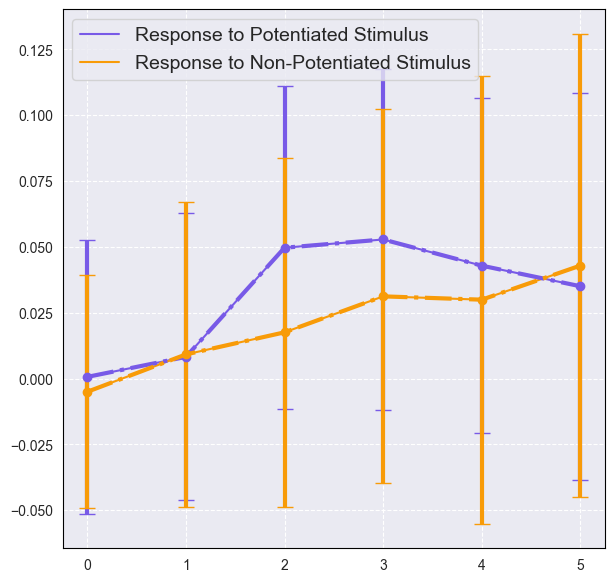

In [14]:
F1_average = np.nanmean(Group_F1,axis = 0)
f1Obvs = np.sqrt(F1_average.shape[0])
f1_std = np.nanstd(Group_F1,axis = 0) / f1Obvs

F2_average = np.nanmean(Group_F2,axis = 0)
f2Obvs = np.sqrt(F2_average.shape[0])
f2_std = np.nanstd(Group_F2,axis = 0)/ f2Obvs
############################################################
fig,axs = plt.subplots(1,figsize = ((7,7)))

axs.plot(F1_average,color = fill[7], label = 'Response to Potentiated Stimulus')
axs.errorbar(x = np.arange(0,6,1),y = F1_average, yerr = f1_std, color = fill[7], capsize=6, linewidth = 3,linestyle='-.', marker='o', markersize=6)

axs.plot(F2_average,color = fill[14], label = 'Response to Non-Potentiated Stimulus')
axs.errorbar(x = np.arange(0,6,1),y = F2_average, yerr = f2_std, color = fill[14], capsize=6, linewidth = 3,linestyle='-.', marker='o', markersize=6)

axs.legend(fontsize = 14)

#### Plot Every Average Response Together

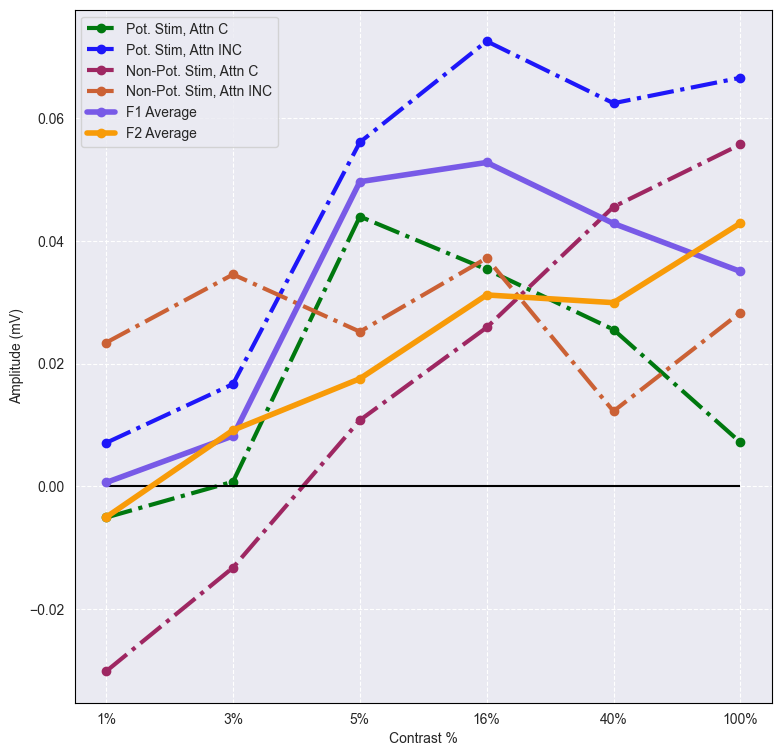

In [15]:
fig,axs = plt.subplots(figsize = (9,9), squeeze=True)

labels = ['Pot. Stim, Attn C','Pot. Stim, Attn INC','Non-Pot. Stim, Attn C ','Non-Pot. Stim, Attn INC']

for sn in  range(4):
    axs.plot(Average_Response_Difference[sn,:], color = fill[color_set[sn]],label = labels[sn],linestyle='-.', marker='o', markersize=6, linewidth = 3)
    #axs.errorbar(x = np.arange(0,6,1),y = Average_Response_Difference[sn,:], yerr = Average_Response_StandDevs[sn,:], color = fill[color_set[sn]], capsize=6 ,linewidth = 3,linestyle='-.', marker='o', markersize=6)
axs.legend()
axs.set_ylabel(f'Amplitude (mV)')
axs.set_xlabel(f'Contrast %')
axs.set_xticks(ticks = np.arange(0,6,1),labels = contrast_labs)
axs.hlines(0,xmin = 0,xmax = 5, color = 'black')

axs.plot(F1_average,color = fill[7],linestyle='-', marker='o', markersize=6,label = 'F1 Average', linewidth = 4)
#axs.errorbar(x = np.arange(0,6,1),y = F1_average, yerr = f1_std, color = fill[7], capsize=6, linewidth = 3,linestyle='-.', marker='o', markersize=6)

axs.plot(F2_average,color = fill[14],linestyle='-', marker='o', markersize=6,label = 'F2 Average',linewidth = 4)
#axs.errorbar(x = np.arange(0,6,1),y = F2_average, yerr = f2_std, color = fill[14], capsize=6, linewidth = 3,linestyle='-.', marker='o', markersize=6, label = 'F2 Average')
axs.legend()

#### *Make Individual Responses Into Dataframes for ANOVA*

In [ ]:
def Init_DataFramesPerSubj(Harmonic_Range_To_Include,NumPrePost,NumBins,HemiInd,AttnXInd,dfIn, SubjIDIn):
    df_Exports = []

    for sn in range(dfIn.shape[0]):
        SubjLabel = SubjIDIn[sn]
        dataFr_In  = dfIn[sn,Harmonic_Range_To_Include,:,:]

        [h,pp,b] = np.shape(dataFr_In) # harmonic , pre post , contrast
        GenerateRows = h*pp*b

        Reps = int((GenerateRows/NumBins))
        DataFrame_Out = np.zeros((GenerateRows,7))

        DataFrame_Out[:,0] = np.tile(SubjLabel, GenerateRows) # subject label'
        DataFrame_Out[:,1] = [val for val in Harmonic_Range_To_Include for _ in range(NumBins*NumPrePost)] # harmonic index
        DataFrame_Out[:,2] = np.tile([0,1], int(GenerateRows/2)) # pre post labels!
        DataFrame_Out[:,3] = np.tile([0,0,1,1,2,2,3,3,4,4,5,5],int(Reps/2)) # contrast values 
        DataFrame_Out[:,4] = np.tile(int(HemiInd), GenerateRows)
        DataFrame_Out[:,5] = np.tile(int(AttnXInd), GenerateRows)

        for i in range(len(Harmonic_Range_To_Include)):
            s = (i*NumBins)*2
            DataFrame_Out[s:s+12,6] = np.ravel(np.column_stack(dataFr_In[i,:]))   

        df = pd.DataFrame(DataFrame_Out)#, columns=['SubjLabel', 'Harmonic', 'PrePost', 'Contrast','Hemifield','Attend2' 'Value'])

        df_Exports.append(df)

    return df_Exports

##### *Sort Data + Set Index Values*

In [462]:
DataSetIn = [F1_Responses[l_pos],F1_Responses[r_pos],F2_Responses[l_pos],F2_Responses[r_pos]]
'Corresponds to ^. F1 == 0, F2 == 1'
' l_pos == 0 (attn Cong), r_pos == 1 (attn Incong)'
Fx_Per_Co = [0,0,1,1] 
AttnX_Per_Co = [0,1,0,1]

#### *Get Subj Ids for Dataframes*

In [ ]:
Attn_C_GoodSubjBool = np.ones(((len(attnL_File_pos))))# attnention Congruent (attnL)
Attn_I_GoodSubjBool = np.ones_like((Attn_C_GoodSubjBool))# attention incongruent (attnR)

ac_nans = np.isnan(attnL_File_pos)
ai_nans = np.isnan(attnR_File_pos)

Attn_C_GoodSubjBool[ac_nans] = 0
Attn_I_GoodSubjBool[ai_nans] = 0

AttnC_IDS = Subj_Ids[Attn_C_GoodSubjBool == 1]
AttnI_IDS = Subj_Ids[Attn_I_GoodSubjBool == 1]

In [464]:
print(AttnC_IDS.shape)
print()
print(AttnI_IDS.shape)

(34,)

(30,)


### Start Making Data Frames for each participant 

In [488]:
Harmonic_Range_To_Include = np.arange(0,2) # 2f - 4f 
NumPrePost = 2
NumBins = 6

In [503]:
P_Attn_Congruent = Init_DataFramesPerSubj(Harmonic_Range_To_Include,NumPrePost,NumBins,HemiInd = Fx_Per_Co[0],AttnXInd = AttnX_Per_Co[0],dfIn = DataSetIn[0], SubjIDIn = AttnC_IDS)
P_Attn_Incongruent = Init_DataFramesPerSubj(Harmonic_Range_To_Include,NumPrePost,NumBins,HemiInd = Fx_Per_Co[1],AttnXInd = AttnX_Per_Co[1],dfIn = DataSetIn[1], SubjIDIn = AttnI_IDS  )

NP_Attn_Congruent = Init_DataFramesPerSubj(Harmonic_Range_To_Include,NumPrePost,NumBins,HemiInd = Fx_Per_Co[2],AttnXInd = AttnX_Per_Co[2],dfIn = DataSetIn[2], SubjIDIn = AttnC_IDS  )
NP_Attn_Incongruent = Init_DataFramesPerSubj(Harmonic_Range_To_Include,NumPrePost,NumBins,HemiInd = Fx_Per_Co[3],AttnXInd = AttnX_Per_Co[3],dfIn = DataSetIn[3], SubjIDIn = AttnI_IDS  )

In [449]:
# oneSub_Vals = prepost_Import_DataSet[0,:,:,:] # [4 x 2 x 6]

# fig,axs = plt.subplots(1,4,figsize = ((12,3)), sharey = True)
# for harmonicVals in range(4):
#     axs[harmonicVals].plot(oneSub_Vals[harmonicVals,0,:], label = 'pre', color = fill[0])
#     axs[harmonicVals].plot(oneSub_Vals[harmonicVals,1,:], label = 'post', color = fill[10])
#     axs[harmonicVals].set_xticks(ticks = np.arange(0,6,1),labels = contrast_labs)
#     axs[harmonicVals].legend()

### Quantify Supersaturation / monoticity index *based on Contrast Response Functions in the visual Wults of the alert burrowing owl: a single unit study by Vieira, Baron et al. (2016)*

*MI = 1.0 - (Rmax - Rcmax) / (Rmax - Rspont)*

#### Rmax is the maximum response of the neuron
#### Rcmax = the firing rate at the maximal response of the neuron (response at 100 % contrast)

#### Rspont = spontaneous activity of the cell

*SI = (Rcmax - Rc50) / Rmax*

#### Rc50 = response to a grating of 50% contrast

##### takes postitive values for a monotonically resiing nonsaturating response and negative values for a nonmonotonic response 


###  *Naka Rushton Curve Fit Datasets + Function*

In [430]:
NR_DataSet = [F1_Responses[l_pos],F1_Responses[r_pos],F2_Responses[l_pos],F2_Responses[r_pos]]

In [ ]:
Full_Contrasts = np.array(np.arange(0.0,100,0.1)) # all contrast from 1% - 100% - ~1k data points
ContrastEnd = (Full_Contrasts.shape[0])
print('length of x array for contrasts: ', Full_Contrasts.shape)

x1 = np.linspace(0, 100, 6) # all 6 contrasts
x2 = np.linspace(0, 100, ContrastEnd) # all 100 contrasts
contrast_levels = [1,3,5,16,40,100]
param_names = ['C50','n','Rmax','b']
color_set = [0,12]

In [ ]:
def naka_rushton(C, C50, n, Rmax, b):
    """
    This function models neural responses captured by Contrast Response Functions
     
    C50 (parameter 1) : Contrast level that yields half of max response (contrast %)
    n (parameter 2)   : Determines the curve arc for fitting (small integer)
    Rmax (Parameter 3): Max response elicited (mv)
    b (Parameter 4)   : Starting value (origin)
    """
    return ((Rmax * ((C**n) / (C50**n + C**n)))+b)

def SaturationIndex(RCmax, Rc50, Rmax):
    #SI = (RCmax - Rc50) / Rmax
    return (RCmax - Rc50) / Rmax

#### *Dynamic Fit Anchors*

In [ ]:
### Model Estimates...based on nothing soild - subject to change 
c50_b = [0,50] # contrast level that yeilds 50% of max response
n_b = [0,4] # determin curve arc for fitting 
Rmax_b = [0,3] # max response 
b_b = [0,1] # starting value
boundaries=([c50_b[0],n_b[0],Rmax_b[0],b_b[0]], [c50_b[1],n_b[1],Rmax_b[1],b_b[1]]) # Boundary Params for C50, N, Rmax and B
#init_g1 = [15,2,1,0] # Initial guess for 2f params

In [ ]:
def Init_NakaRushton_Fits(naka_rushton, HOI, Clean_Functions = NR_DataSet):
    """ Get Naka Rushton Params for each subject for each hemifield
        naka_rushton = Naka Rushton Function
        Clean_Functions = dataset for: F1 / F2 x attnL / attnR
        HOI = Harmonic of Interest (0,1,2,3) = (2f,4f,6f,8f)

        RETURNS: 3D array - Subject x Pre/Post x 4 (Fit Values)
    """
    HarmonicData = Clean_Functions[:,HOI,:,:] # acess 1 harmonic dataset only
    Hyperbolic_Parameters = np.zeros((int(HarmonicData.shape[0]),2,4)) # [ns x pp x fit values]

    for fit_iter in range(int(HarmonicData.shape[0])):
        data_to_fit = HarmonicData[fit_iter,:,:]
        for pp in range(2): # import pre post crf per single subject 
            d = data_to_fit[pp,:]
            Hyperbolic_Parameters[fit_iter,pp,:], _ = curve_fit(naka_rushton,contrast_levels,d,bounds=boundaries, nan_policy='omit', method='trf')

    return Hyperbolic_Parameters
#######################################################
def Init_Smooth_Fits(naka_rushton,Param_ValsMat, pseudo_ContrastArr):
    'empty df to fill based on NR formula for values derived from scipy curve fit'
    Smooth_HyperRatios = np.zeros((int(Param_ValsMat.shape[0]),2,int(Full_Contrasts.shape[0])))

    for param_fit_iter in range(int(Param_ValsMat.shape[0])): # per subject
        parameters_to_fit = Param_ValsMat[param_fit_iter,:]
        for pp_nr_params in range(2): # import pre post crf 
            px_param_vals = parameters_to_fit[pp_nr_params]
            Smooth_HyperRatios[param_fit_iter,pp_nr_params,:] = naka_rushton(Full_Contrasts,px_param_vals[0],px_param_vals[1],px_param_vals[2],px_param_vals[3] )

    return Smooth_HyperRatios

#### *Run Fit Values for all Data*

In [443]:
All_NakaRushton_Values = {}
for Co_iters in range(4):
    All_NakaRushton_Values[Co_iters] = Init_NakaRushton_Fits(naka_rushton,HOI = 0, Clean_Functions = NR_DataSet[Co_iters])
    #print(All_NakaRushton_Values[ConiditonIters].shape)

In [447]:
Smooth_NakaRushton_Computs = {}
for Co_iters in range(4):
    Smooth_NakaRushton_Computs[Co_iters] = Init_Smooth_Fits(naka_rushton,Param_ValsMat = All_NakaRushton_Values[Co_iters], pseudo_ContrastArr = Full_Contrasts)

#### *Plot Some Fits*

C:\Users\plimon\AppData\Local\Temp\ipykernel_14876\2602338004.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(figsize = ((7,5)))


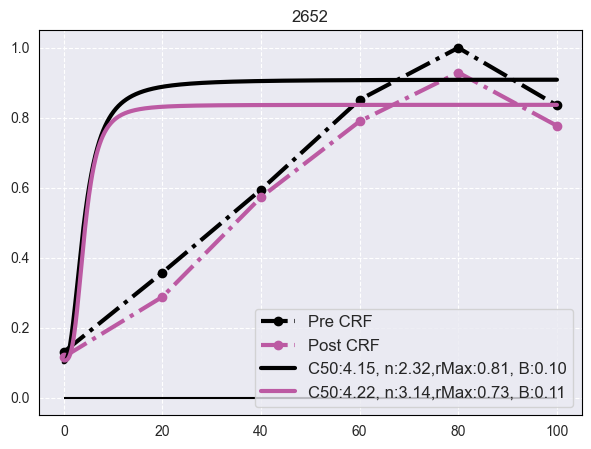

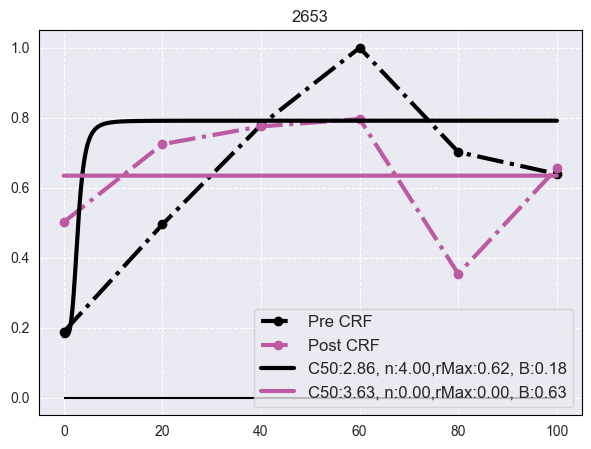

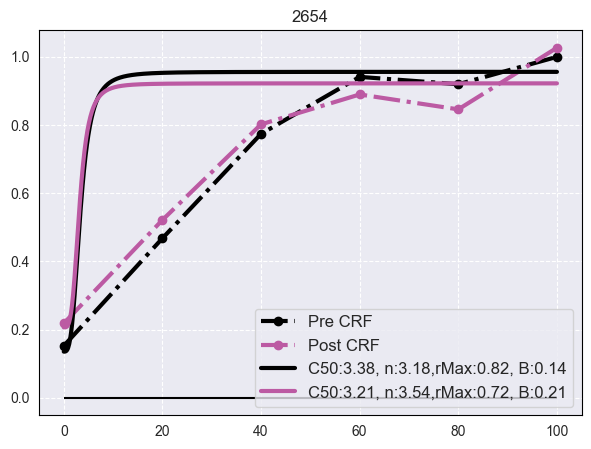

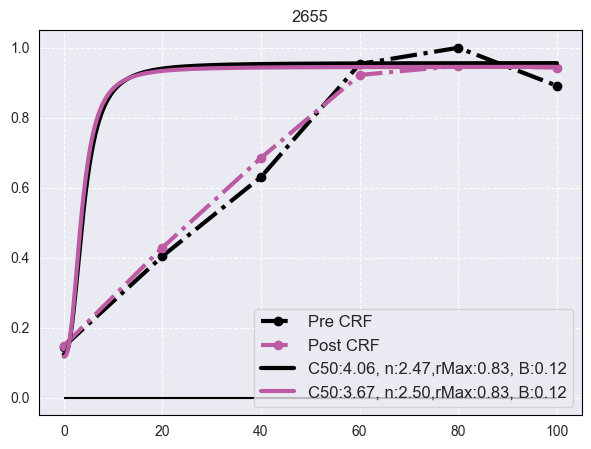

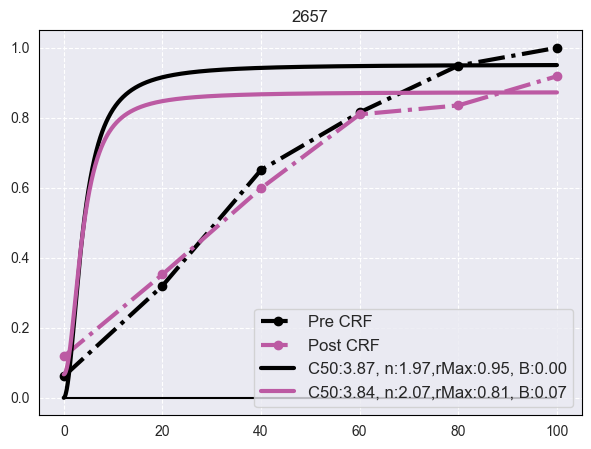

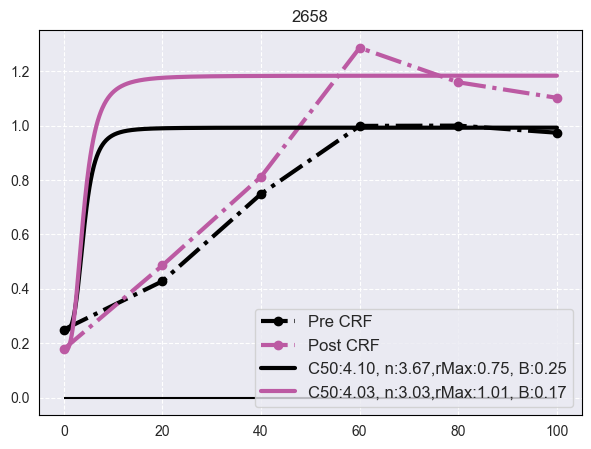

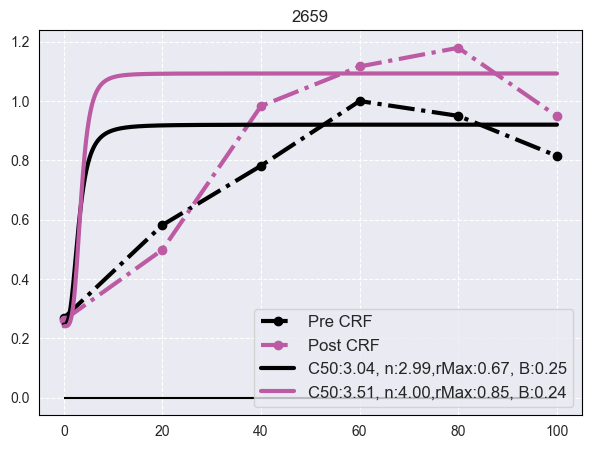

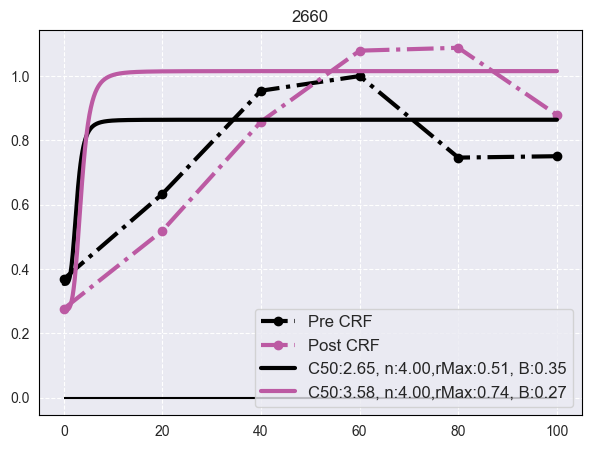

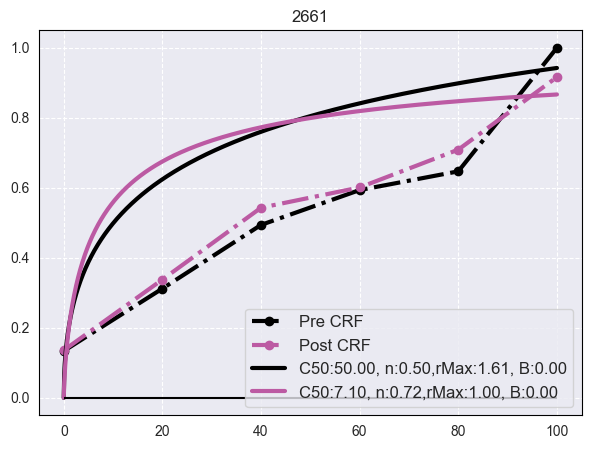

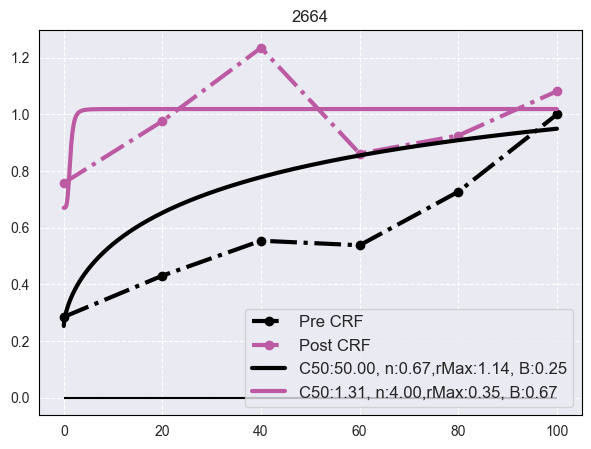

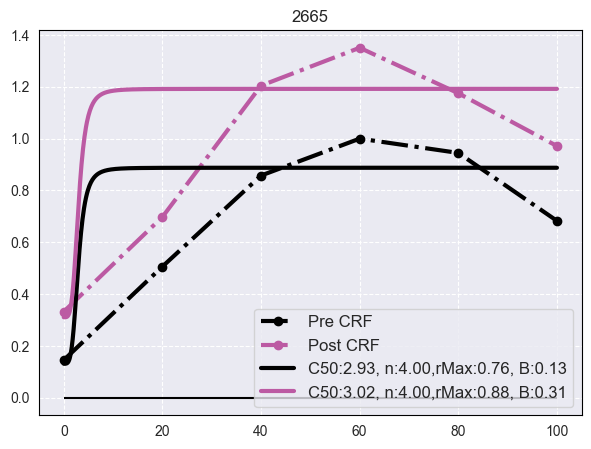

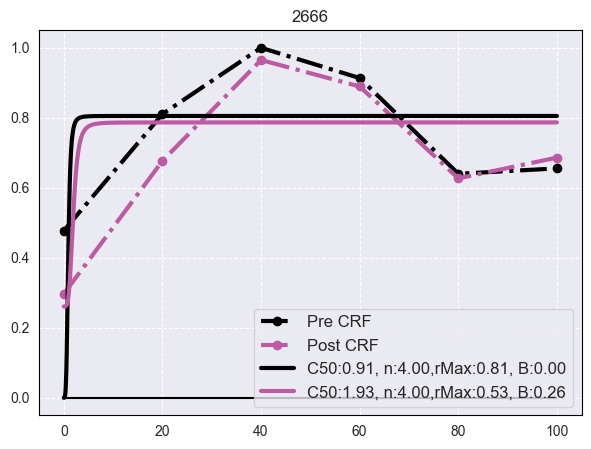

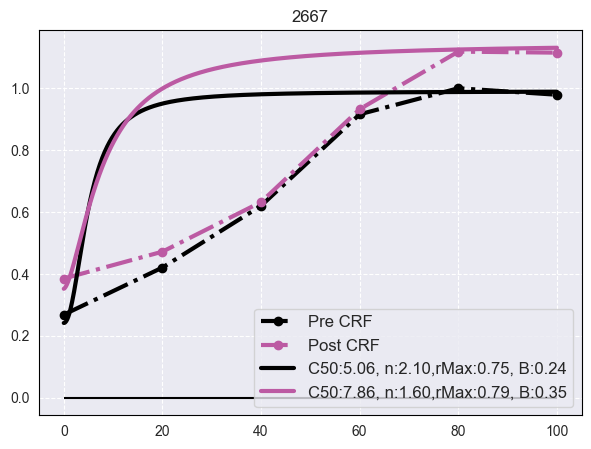

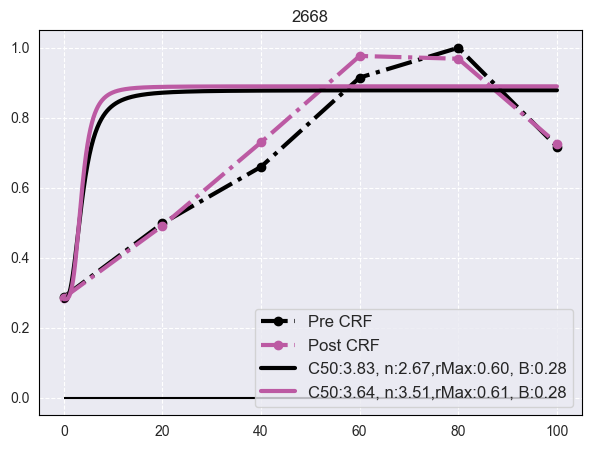

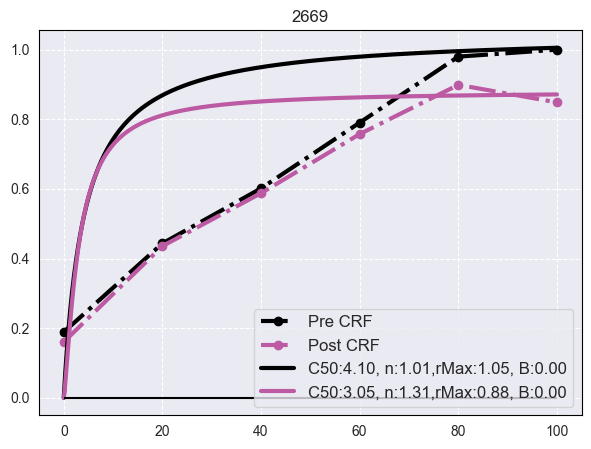

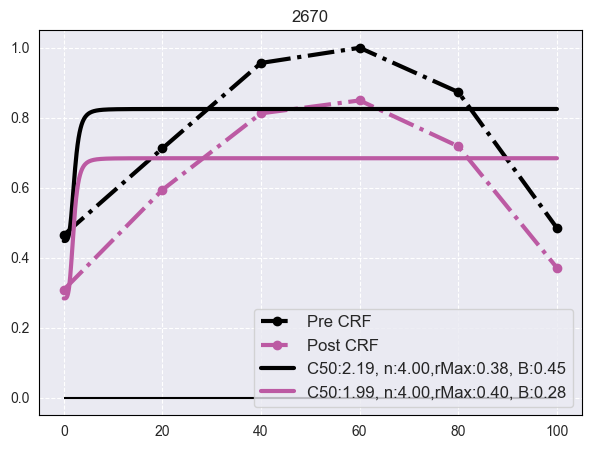

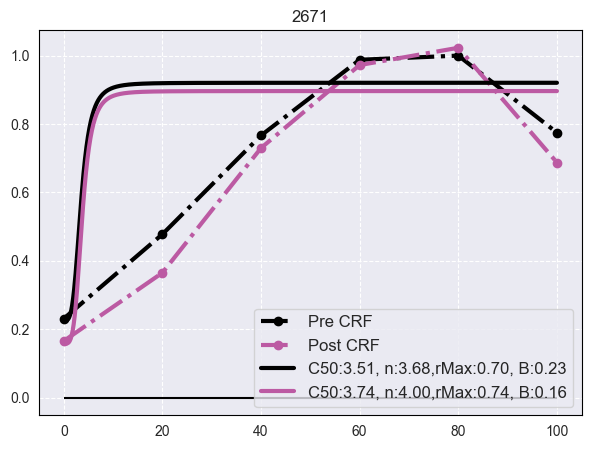

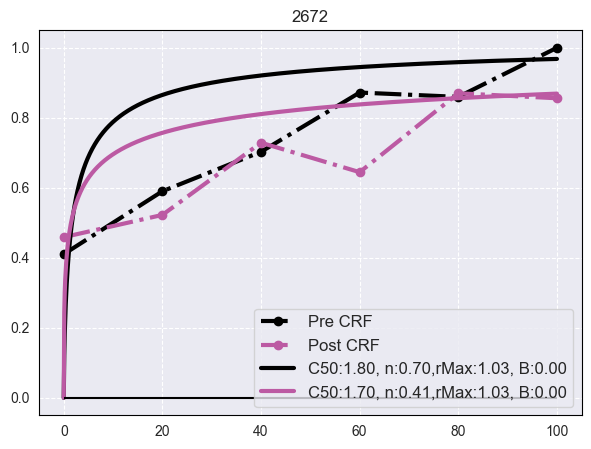

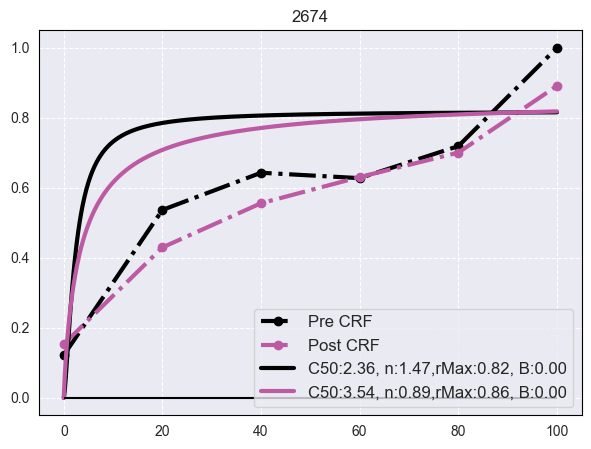

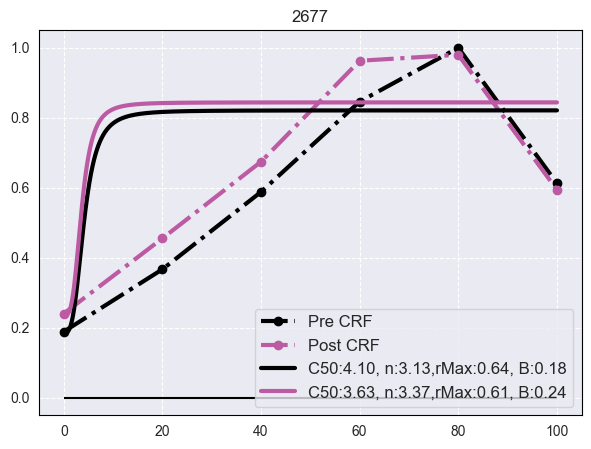

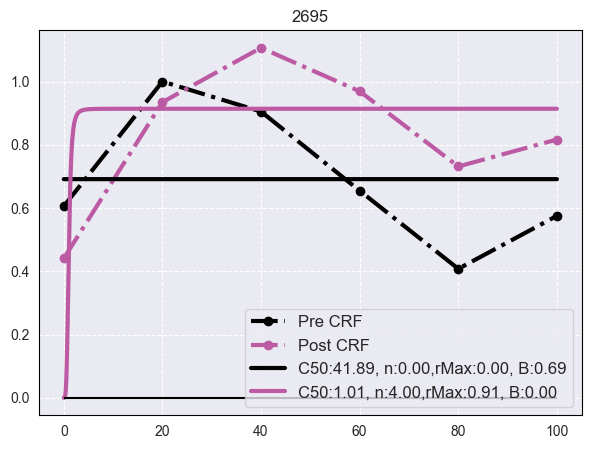

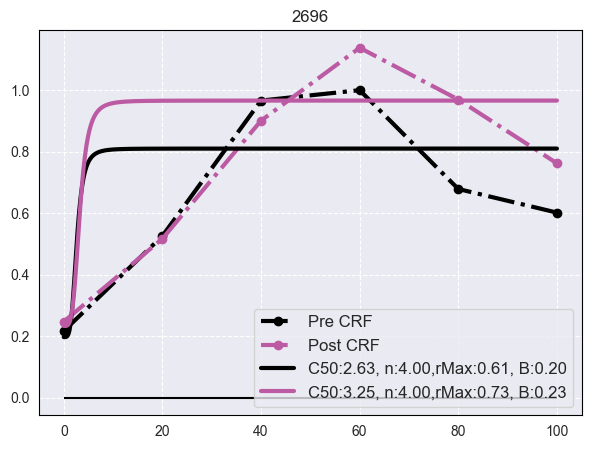

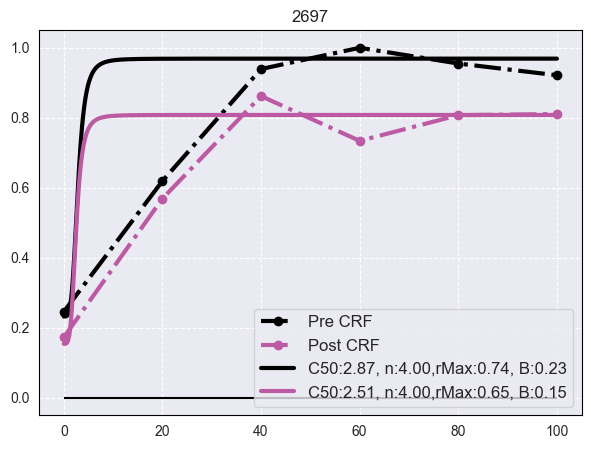

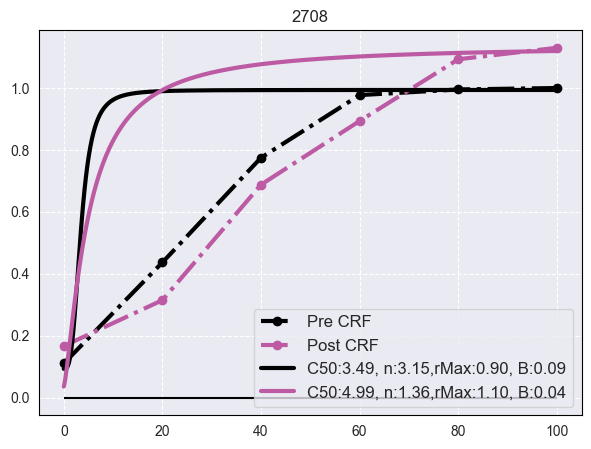

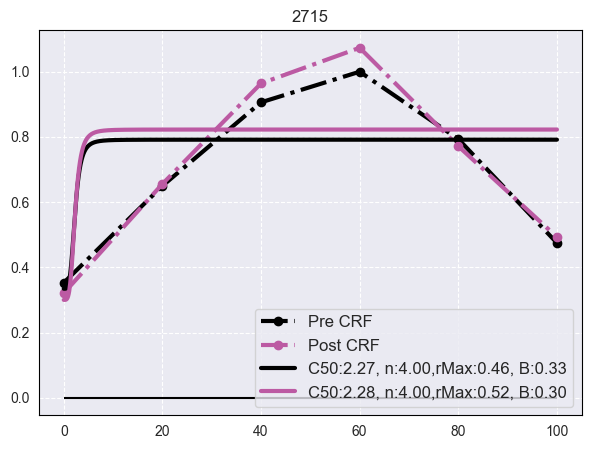

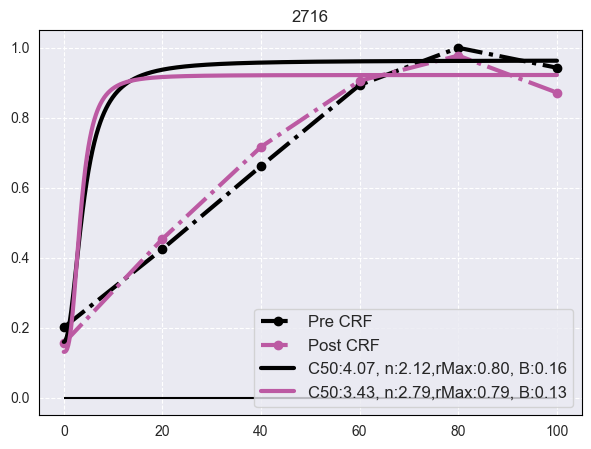

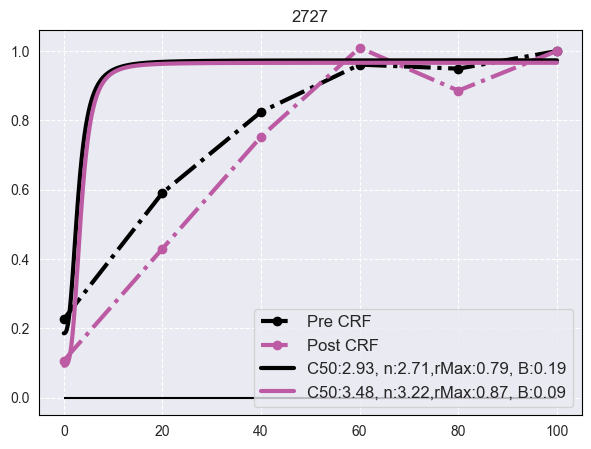

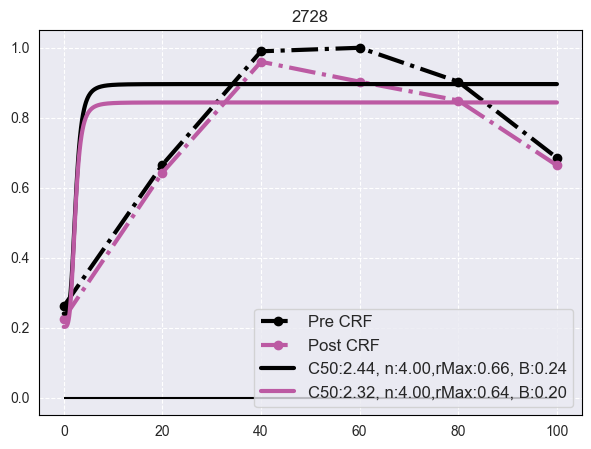

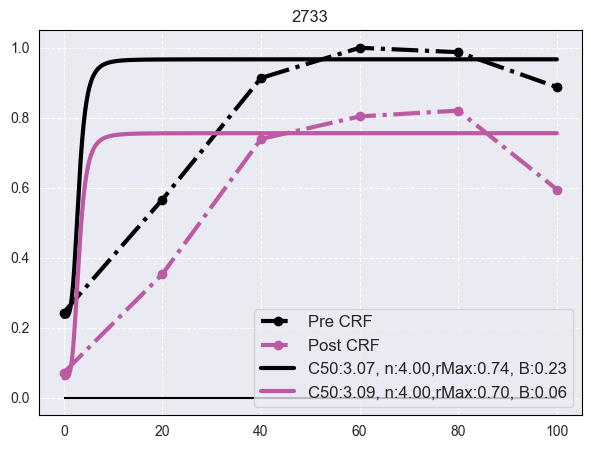

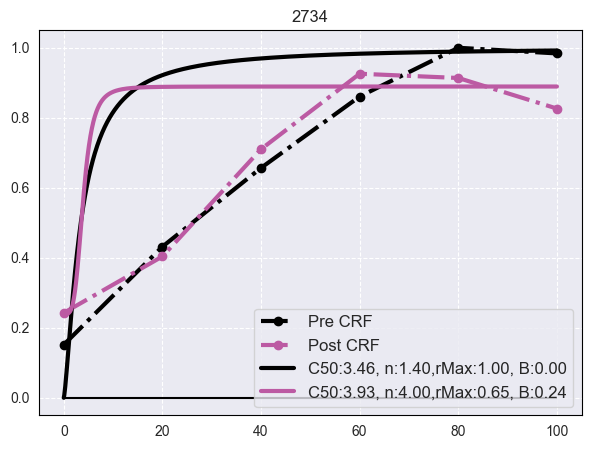

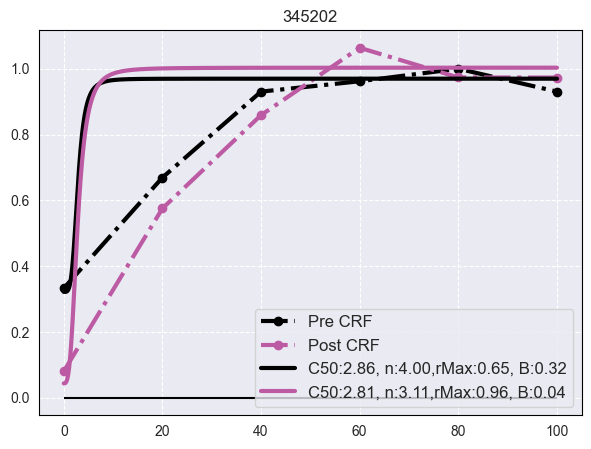

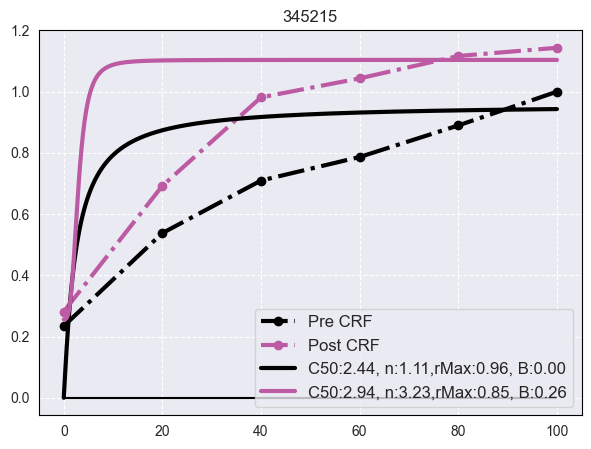

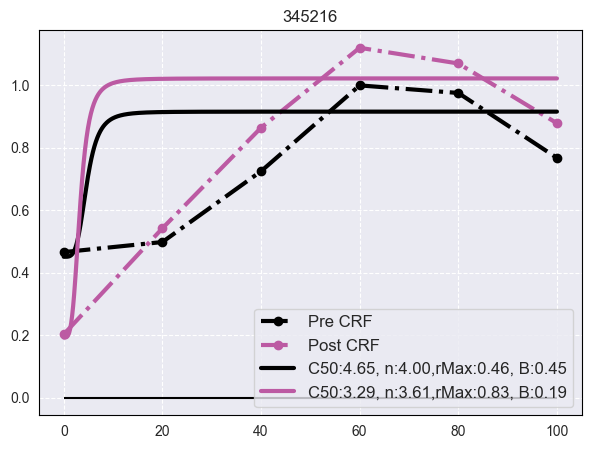

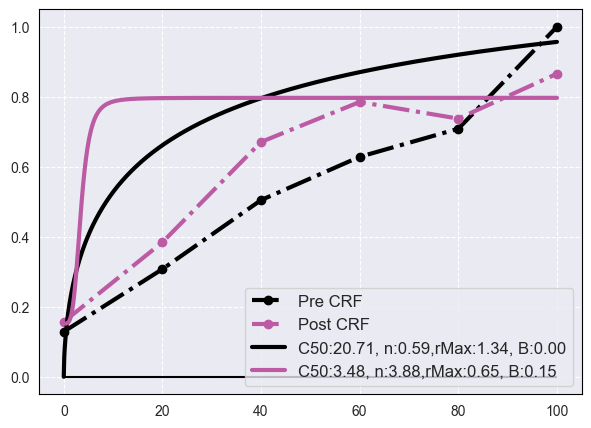

In [400]:
for nsx in range(int(Clean_Functions.shape[0])):
    axes.set_title(f'{Cond_Ids[nsx]}')
    fig, axes = plt.subplots(figsize = ((7,5)))

    param_labels = Hyperbolic_Parameters[nsx,:,:]
    axes.plot(x1,Clean_Functions[nsx,0,:], color = fill[0], linestyle='-.', marker='o', markersize=6, linewidth = 3,label = 'Pre CRF')
    axes.plot(x1,Clean_Functions[nsx,1,:], color = fill[10],linestyle='-.', marker='o', markersize=6, linewidth = 3, label = 'Post CRF')

    axes.plot(x2,Smooth_HyperRatios[nsx,0,:], color = fill[0], linewidth = 3, label = f'C50:{param_labels[0,0]:.2f}, n:{param_labels[0,1]:.2f},rMax:{param_labels[0,2]:.2f}, B:{param_labels[0,3]:.2f}')
    axes.plot(x2,Smooth_HyperRatios[nsx,1,:], color = fill[10], linewidth = 3, label = f'C50:{param_labels[1,0]:.2f}, n:{param_labels[1,1]:.2f},rMax:{param_labels[1,2]:.2f}, B:{param_labels[1,3]:.2f}')
    axes.hlines(0,xmin = 0, xmax = 100, color = fill[0])
    axes.legend(loc = 'lower right', fontsize = 12)